In [1]:
import sys

sys.path.append('../')

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/incidents_train.csv')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

assert df.id.is_unique == True

## Análise Exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5082 non-null   int64 
 1   year              5082 non-null   int64 
 2   month             5082 non-null   int64 
 3   day               5082 non-null   int64 
 4   country           5082 non-null   object
 5   title             5082 non-null   object
 6   text              5082 non-null   object
 7   hazard-category   5082 non-null   object
 8   product-category  5082 non-null   object
 9   hazard            5082 non-null   object
 10  product           5082 non-null   object
dtypes: int64(4), object(7)
memory usage: 436.9+ KB


In [5]:
df.head()

,id,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


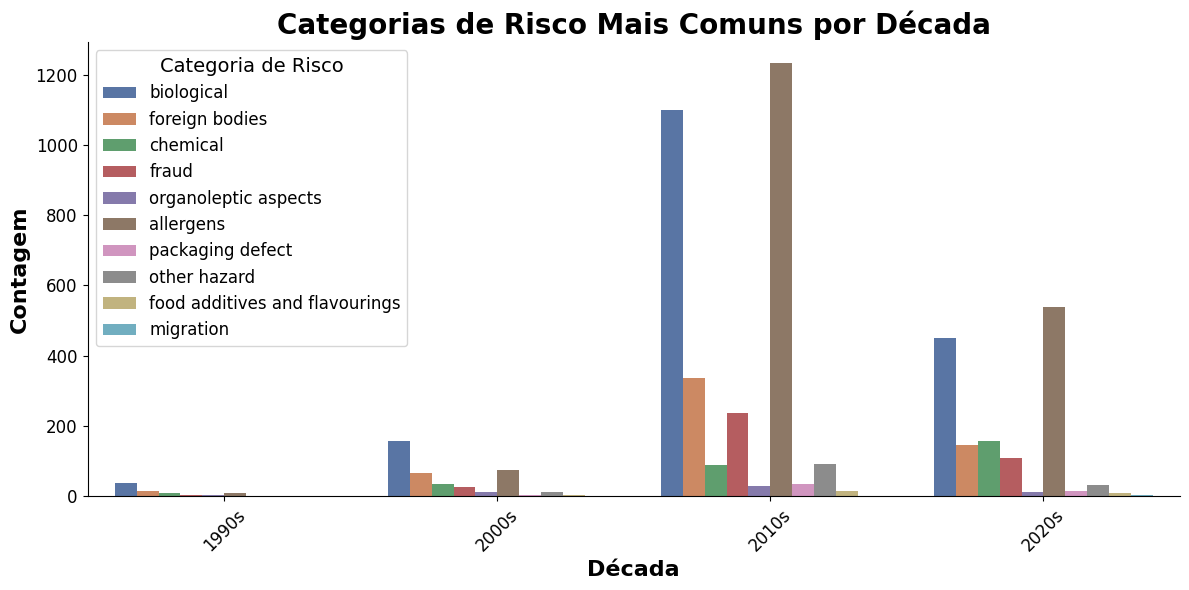

In [6]:
# Categorias de risco mais comuns por década
# Podemos usar a coluna year para agrupar por década

df['decade'] = df['year'] // 10 * 10
df['decade'] = df['decade'].astype(str) + 's'

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='decade', hue='hazard-category', palette='deep')

# Adicionar títulos e rótulos
ax.set_title('Categorias de Risco Mais Comuns por Década', fontsize=20, weight='bold')
ax.set_xlabel('Década', fontsize=16, weight='bold')
ax.set_ylabel('Contagem', fontsize=16, weight='bold')
ax.legend(title='Categoria de Risco', fontsize=12, title_fontsize=14)

# Personalizar parâmetros dos ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remover as bordas superior e direita
sns.despine()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [7]:
from models.train import Classifier

clf = Classifier()

[INIT] Initializing Transformer Classifier
[INIT] Model: microsoft/deberta-v3-small
[INIT] Using device: cpu
[INIT] Initialization complete


## Hazard Category prediction

### Experiment 1:
Usando somente os dados textuais (title, hazard-category)

In [8]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df['hazard-category'])

In [ ]:
temporal_features = df[['year']].to_numpy()
# normalize
temporal_features = (temporal_features - temporal_features.mean()) / temporal_features.std()

array([[-4.57430173],
       [-4.57430173],
       [-4.57430173],
       ...,
       [ 1.12793691],
       [ 1.12793691],
       [ 1.12793691]])

In [13]:
report = clf.train_model(df['title'], labels, additional_features=temporal_features, category='hazard-category', epochs=2, batch_size=32)


[TRAINING] Starting training
[TRAINING] Total texts: 5082
[TRAINING] Epochs: 2
[TRAINING] Batch size: 32
[TRAINING] Training set size: 4065
[TRAINING] Validation set size: 1017
[TRAINING] Loading tokenizer...
[TRAINING] Creating datasets...
[DATASET] Preparing dataset with 4065 texts
[DATASET] Dataset preparation completed in 0.53 seconds
[DATASET] Preparing dataset with 1017 texts
[DATASET] Dataset preparation completed in 0.08 seconds
[TRAINING] Creating data loaders...
[TRAINING] Number of labels: 10
[TRAINING] Additional feature size: 1
[TRAINING] Loading pre-trained model...
[TRAINING] Preparing optimizer and scheduler...
[TRAINING] Starting training loop...
[TRAINING] Epoch 1/2


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


tensor([[-0.0279, -0.0228,  0.0028,  ..., -0.0670, -0.0000, -0.0607],
        [-0.0614, -0.0000,  0.0040,  ..., -0.0000, -0.0977, -0.0000],
        [-0.0000, -0.0399, -0.0120,  ..., -0.0852, -0.0480, -0.0654],
        ...,
        [-0.0259, -0.0610,  0.0003,  ..., -0.0000, -0.1014, -0.0796],
        [ 0.0015, -0.0090,  0.0030,  ..., -0.0307, -0.0366, -0.0615],
        [-0.0251, -0.0161,  0.0407,  ..., -0.0551, -0.0734, -0.0247]],
       grad_fn=<MulBackward0>)


RuntimeError: expected scalar type Long but found Int